- BECHEUR Yazid 
- PARCOURS DATA ANALYST 2021 
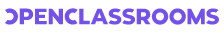

--------
# PROJET 6 : ANALYSE DES VENTES D'UNE LIBRAIRIE
--------

### PARTIE 1 : IMPORTATION ET NETTOYAGE DES DONNEES

#### 1. IMPORTATION DES LIBRAIRES
#### 2. DATASET 'customers.csv'
#### 3. DATASET 'products.csv'
#### 4. DATASET 'transactions.csv'
#### 5. JOINTURES DES 3 DATASETS POUR ANALYSE
### PARTIE 2 : ANALYSE DES DONNEES
#### 1. EVOLUTION DU CHIFFRE D'AFFAIRE DANS LE TEMPS
   - Chiffre d'affaire total
   - Chiffre d'affaire annuel
   - Chiffre d'affaire mensuel
       
#### 2. REPARTITION DU CHIFFRE D'AFFAIRE PAR CATEGORIE DE PRODUITS
           
#### 3. LISTE DES PRODUITS LES MIEUX VENDUS ET LES PRODUITS LES MOINS BIEN VENDUS
   
#### 4. REPARTITION DU CHIFFRE D'AFFAIRE ENTRE LES CLIENTS (courbe de LORENZ)    
   
#### 5. REPARTITION DU CHIFFRE D'AFFAIRE PAR GENRE  DU CLIENT ET CATEGORIE DES PRODUITS

#### 6. ANALYSE DES CORRELATIONS ENTRE L'AGE ET :      
   - A - Le montant total des achats
   - B - La fréquence des achats
   - C - La taille du panier moyen 
   - D - Les catégories des livres achetés
      
#### 7. Calcule de la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159
#### 8. Exploration des jours et heures des commandes 
---------

# PARTIE 1 : IMPORTATION, VERIFICATION ET NETTOYAGE DES DONNEES

--------
### 1. IMPORTATION DES LIBRAIRIES
-------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import tzinfo, timedelta, datetime
import scipy.stats as st
pd.options.mode.chained_assignment = None

-----
### 2. DATASET 'customers.csv'
----

#### Démarche :
   - Vérification de la colonne client_id qu'elle bien une clé primaire du dataset clients 
   - Recherche d'éventuelles valeurs aberrantes dans la colonne 'client_id' qui ne respectent pas la forme de la clé primaire : suppression de 2 valeurs aberrantes
   - Vérification des statistiques des colonnes du dataframe : RAS
   - Vérification de l'absence de valeurs aberrantes : aucune valeur abberante
   - Vérification du type des colonnes, les valeurs non nulles et des colonnes index : type des données conforme
   - Vérification de l'absence de valeurs nulles : aucune valeur nulle
  

In [2]:
# Importer le fichier customers 
clients = pd.read_csv('customers.csv')
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
# Rechercher d'éventuelles valeurs aberrantes dans la colonne 'client_id' qui ne respectent pas la forme de la clé primaire
valeurs_aberr=clients[~clients['client_id'].str.contains("c_")]
valeurs_aberr.head()

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [4]:
# Suppression des valeurs aberrantes (ct_0 et ct_1) de la colonne 'client_id'
clients.drop(clients[clients['client_id'].str.contains("ct_")].index, inplace=True)

In [5]:
# vérification des valeurs aberrantes (ct_0 et ct_1) supprimées
clients[clients['client_id'].str.contains("ct_")]

,client_id,sex,birth


### Vérification que la colonne  'client_id' est bien une clé primaire 

In [6]:
# création d'une fonction pour vérifier si une colonne est bien une clé primaire d'un dataframe
def isPrimaryKey(df, columnList): 
     # Vérification si la colonne existe dans le dataframe
    for columnInput in columnList:
        if columnInput not in df.columns:
            raise ValueError("'{}' is not a valid column".format(columnInput))
    # --> y a-t-il deux lignes identiques lorsque nous projetons df ?
    # nous projetons df dans les colonnes données
    # on supprime les doublons de la projection
    # on compte le nombre de ligne et on le compare à l'initiale
    return len(df) == len(df.drop_duplicates(subset=columnList))

In [7]:
# Tester si la colonne 'product_id' est une clé primaire du daframe clients
isPrimaryKey(clients, ['client_id'])

True

In [8]:
# Consultation des statistiques du dataframe 'clients'
print(clients.describe(include='all'))

       client_id   sex        birth
count       8621  8621  8621.000000
unique      8621     2          NaN
top       c_6270     f          NaN
freq           1  4490          NaN
mean         NaN   NaN  1978.275606
std          NaN   NaN    16.917958
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000


In [9]:
# Informations sur les type des colonnes, les valeurs non nulles et des colonnes index
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.4+ KB


In [10]:
# vérification des proportions des valeurs nulles
(clients.isna().sum()/clients.shape[0]).sort_values(ascending=True)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [11]:
# Afficher uniquement les variables de la colonne 'sex'
clients['sex'].unique()

array(['f', 'm'], dtype=object)

##### Informations :

- 2 valeurs aberrantes ('ct_0','ct_1') supprimées de la colonne client_id
- La colonne client_id est bien une clé primaire
- nombre de lignes = 8621 
- colonne sex (qualitative): f,h, type = 'object' 
- colonne birth (quantitative) : min = 1929, max = 2004, type = 'int64'
- Aucune valeur nulle
   
  

----
### 3. DATASET 'products.csv'
----

#### Démarche :
   - Vérification de la colonne id_prod clé primaire du dataframe produits : la colonne est bien une clé primaire
   - Recherche d'éventuelles valeurs aberrantes dans la colonne 'id_prod' qui ne respectent pas la forme de la clé primaire : une valeur aberrante supprimée
   - Vérification des statistiques des colonnes du dataframe : RAS
   - Vérification du type des colonnes, les valeurs non nulles et des colonnes index :
   - Vérification de l'absence de valeurs nulles 

In [12]:
# Importer le fichier products au format csv 
produits = pd.read_csv('products.csv')
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
# Rechercher d'éventuelles valeurs aberrantes dans la colonne 'id_prod' qui ne respectent pas la forme de la clé primaire
verif=produits[~produits['id_prod'].str.contains('0_|1_|2_')]
verif.head()

,id_prod,price,categ
731,T_0,-1.0,0


In [14]:
# Suppression des valeurs aberrantes (ct_0 et ct_1) de la colonne 'client_id'
produits.drop(produits[produits['id_prod'].str.contains("T_0")].index, inplace=True)

In [15]:
# Nombre de produits par catégorie
produits.groupby('categ')[['categ']].agg(['count'])

,categ
,count
categ,
0,2308
1,739
2,239


In [16]:
# Tester si la colonne 'id_prod' est une clé primaire du daframe produits
isPrimaryKey(produits, ['id_prod'])

True

In [17]:
# Vérification du type des colonnes, les valeurs non nulles et des colonnes index
produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 231.7+ KB


In [18]:
# modifer le type de la variable 'categ' en variable catégorielle
produits['categ'] = produits['categ'].astype('category')

In [19]:
# vérification
produits[['categ']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   categ   3286 non-null   category
dtypes: category(1)
memory usage: 158.0 KB


In [20]:
# Vérifications des valeurs nulles
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [21]:
# Consultation des statistiques des colonnes du dataframe 'produits'
print(produits.describe(include='all'))

       id_prod        price   categ
count     3286  3286.000000  3286.0
unique    3286          NaN     3.0
top      0_825          NaN     0.0
freq         1          NaN  2308.0
mean       NaN    21.863597     NaN
std        NaN    29.849786     NaN
min        NaN     0.620000     NaN
25%        NaN     6.990000     NaN
50%        NaN    13.075000     NaN
75%        NaN    22.990000     NaN
max        NaN   300.000000     NaN


##### Informations :

- Une valeurs aberrantes ('T_0') supprimées de la colonne [id_prod]
- La colonne id_prod est bien une clé primaire du dataset "produis"
- Nombre de lignes =  3286
- Colonne price (quanitative): min = 0.62, max = 300, type = 'float64' 
- Colonne categ (qualitative) : modalités = 0,1,2, type = 'category'
- Aucune valeur nulle

-----
### 4. DATASET 'transactions.csv'
-----

##### Démarche :
   - Vérification des statistiques et valeurs aberrantes des colonnes du dataset : des valeurs test de la colonne 'date' représentent des valeurs aberrantes, ces valeurs sont supprimées; ex: test_2021-03-01 02:30:02.237413
   - Vérification de l'absence de valeurs nulles : aucune valeur nulle
   - Vérification du type des colonnes, les valeurs non nulles et des colonnes index : type des données de la colonne 'date' est au format 'object', elle sera convertie après avoir effectué les jointures
   - Vérification de l'absence de doublons : pas de doublons
   - Vérification (rapprochement) des références des produits et clients avec celles présentes dans le dataset 'transactions' :
        -  Vérifier si tous les clients ayants effectués des transactions sont également référencés dans le dataset 'clients' et inversement
        - Vérifier si tous les produits achetés sont également référencés dans le dataset 'produits' et inversement
  
   

In [22]:
# Importer le fichier 'transactions' 
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [23]:
# Consultation des statistiques du dataframe 'transactions'
print(transactions.describe(include='all'))

       id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488


In [24]:
# Afficher les valeurs aberrantes
transactions[transactions['date'].str.contains("test")]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [25]:
# Suppression des valeurs aberrantes (test) de la colonne 'date'
transactions.drop(transactions[transactions['date'].str.contains("test")].index,inplace=True)

In [26]:
# Vérifications des statistiques des colonnes
print(transactions.describe(include='all'))

       id_prod                        date session_id client_id
count   679332                      679332     679332    679332
unique    3266                      679332     342315      8600
top      1_369  2021-07-13 11:29:02.334340   s_118668    c_1609
freq      2252                           1         14     25488


In [27]:
# Vérificaton des valeurs nulles
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [28]:
# Vérification du type des colonnes, et des valeurs non nulles
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [29]:
# Vérification et supression des doublons
transactions.drop_duplicates().count()

id_prod       679332
date          679332
session_id    679332
client_id     679332
dtype: int64

-----
##### VERIFICATION (RAPPROCHEMENT) DES REFERENCES DES 'PRODUITS' ET DES 'CLIENTS' DANS LE DATASET 'TRANSACTIONS'
-----

  

###### Références  clients 

###### JOINTURE 'LEFT'

In [30]:
# faire une joitures left entre le df transactions et clients pour vérifier la concordance 
# entre la colonne clé primaire des 2 df
join_cli_left=transactions.merge(clients,on='client_id', how='left')
join_cli_left.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980


In [31]:
# Vérifier les valeurs nulles
join_cli_left.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

##### JOINTURE 'RIGHT'

In [32]:
# faire une joitures right entre le df transactions et clients pour vérifier la concordance 
# entre la colonne clé primaire des 2 df
join_cli_right=transactions.merge(clients,on='client_id', how='right')
join_cli_right.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1316,2021-12-29 09:11:18.860592,s_141762,c_4410,f,1967
1,1_385,2021-03-22 01:40:22.782925,s_9707,c_4410,f,1967
2,1_190,2021-11-12 18:11:43.280574,s_118628,c_4410,f,1967
3,0_1455,2021-03-22 14:29:25.189266,s_9942,c_4410,f,1967
4,1_483,2022-03-13 21:35:55.949042,s_178686,c_4410,f,1967


In [33]:
# Vérifier les valeurs nulles
join_cli_right.isnull().sum()

id_prod       21
date          21
session_id    21
client_id      0
sex            0
birth          0
dtype: int64

#####  Liste de 21 clients qui n'ont fait aucun achat en ligne 

In [34]:
# Afficher les lignes avec les valeurs nulles
val_manquantes_clients = join_cli_right[join_cli_right.isna().any(axis=1)]
val_manquantes_clients.head()

,id_prod,date,session_id,client_id,sex,birth
59493,NaN,NaN,NaN,c_8253,f,2001
200286,NaN,NaN,NaN,c_3789,f,1997
218173,NaN,NaN,NaN,c_4406,f,1998
220388,NaN,NaN,NaN,c_2706,f,1967
225538,NaN,NaN,NaN,c_3443,m,1959


##### REFERENCES PRODUITS 

###### JOINTURE 'LEFT'

In [35]:
# faire une joitures left entre le df 'transactions' et 'produits' pour vérifier la concordance 
# entre la colonne clé primaire des 2 df
join_prod_left=transactions.merge(produits,on='id_prod', how='left')
join_prod_left.tail()

,id_prod,date,session_id,client_id,price,categ
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0
679331,1_523,2022-09-28 01:12:01.973763,s_274568,c_3873,23.99,1


In [36]:
# vérification des valeurs nulles
join_prod_left.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
dtype: int64

##### 221 achats du produit 0_2245  dont on ne connait ni le prix ni la catégorie

In [37]:
# Afficher les lignes avec les valeurs nulles
val_manquantes = join_prod_left[join_prod_left.isna().any(axis=1)]
val_manquantes.head()

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN


In [38]:
# vérification des références id_prod uniques
val_manquantes['id_prod'].unique()

array(['0_2245'], dtype=object)

##### JOINTURE 'RIGHT'

In [39]:
# faire une joitures left entre le df transactions et produits pour vérifier la concordance 
# entre la colonne clé primaire des 2 df
join_prod_right=transactions.merge(produits,on='id_prod', how='right')
join_prod_right.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1421,2022-02-20 17:04:37.204937,s_168213,c_6389,19.99,0
1,0_1421,2022-11-19 03:42:20.707442,s_299590,c_8364,19.99,0
2,0_1421,2021-09-19 14:58:46.726179,s_92304,c_3544,19.99,0
3,0_1421,2023-01-11 16:04:24.367855,s_325369,c_1025,19.99,0
4,0_1421,2021-08-01 19:33:18.877168,s_70071,c_2298,19.99,0


In [40]:
# vérification des valeurs nulles
join_prod_right.isnull().sum()

id_prod        0
date          21
session_id    21
client_id     21
price          0
categ          0
dtype: int64

##### Liste de 21 produits qui n'ont fait objet d'aucune commande 

In [41]:
# Afficher les lignes avec les valeurs nulles
val_manquantes_prod = join_prod_right[join_prod_right.isna().any(axis=1)]
val_manquantes_prod.head()

,id_prod,date,session_id,client_id,price,categ
39705,0_1016,NaN,NaN,NaN,35.06,0
62805,0_1780,NaN,NaN,NaN,1.67,0
162765,0_1062,NaN,NaN,NaN,20.08,0
177522,0_1119,NaN,NaN,NaN,2.99,0
181172,0_1014,NaN,NaN,NaN,1.15,0


##### Informations : 

- 200 valeurs aberrantes test (ex: test_2021-03-01 02:30:02.237413) supprimées de la colonne [date]
- Nombre de lignes =   679332 
- Valeurs uniques: colonne id_pro = 3266   colonne clien_id = 8600
- Type des données de la colonne 'date' est au format 'object', elle sera convertie en datetime après avoir effectué les jointures
- Pas de doublons
- Aucune valeur nulle
- 21 clients présents dans le dataset 'customers' n'ont fait aucun achat sur toute cette periode
- 221 achats du produit 0_2245  dont on ne connait ni le prix ni la catégorie
- 21 produits qui n'ont fait objet d'aucune commande sur tooute cette période

-----
-----
### 5. JOINTURES ENTRE LES 3 DATASETS POUR ANALYSE
-----
-----
##### Démarche :
   - Effectuer une jointure interne entre les dataframe 'transactions' et 'clients'  ====> join1
   - Effectuer une jointure interne entre les dataframe join1 et produits  ====> join2
   - Création de 3 nouvelles colonnes [jour], [mois], [année]
   

### Jointure 'inner' entre les 2 dataset 'transactions' et 'clients'

In [42]:
# faire une jointure 'inner' entre df transactions et clients 
join1=transactions.merge(clients,on='client_id', how='inner')
join1.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986


### Jointure entre dataframe 'join1' et 'produits'

In [43]:
# faire une jointure entre join1 et produits
join2=join1.merge(produits,on='id_prod', how='inner')
join2.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0


In [44]:
# Vérifications des statistiques des colonnes
print(join2.describe(include='all'))

       id_prod                        date session_id client_id     sex  \
count   679111                      679111     679111    679111  679111   
unique    3265                      679111     342275      8600       2   
top      1_369  2021-10-18 00:27:45.786963   s_118668    c_1609       m   
freq      2252                           1         14     25488  340826   
mean       NaN                         NaN        NaN       NaN     NaN   
std        NaN                         NaN        NaN       NaN     NaN   
min        NaN                         NaN        NaN       NaN     NaN   
25%        NaN                         NaN        NaN       NaN     NaN   
50%        NaN                         NaN        NaN       NaN     NaN   
75%        NaN                         NaN        NaN       NaN     NaN   
max        NaN                         NaN        NaN       NaN     NaN   

                birth          price     categ  
count   679111.000000  679111.000000  679111.0  
u

In [45]:
# indexer la colonne date et conversion en datetime
join2['date']=pd.to_datetime(join2['date'])
join2=join2.set_index('date')
join2.head()

,id_prod,session_id,client_id,sex,birth,price,categ
date,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0


In [46]:
# création des colonnes : année,mois,heure et jour
join2['année']=join2.index.year
join2['mois']=join2.index.month
join2['heure']=join2.index.hour
join2['jour']=join2.index.day_name()
join2.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday


In [47]:
#Vérification du type des colonnes, et des valeurs non nulles
join2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2022-05-20 13:21:29.043970 to 2021-03-08 21:10:32.250919
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679111 non-null  object  
 1   session_id  679111 non-null  object  
 2   client_id   679111 non-null  object  
 3   sex         679111 non-null  object  
 4   birth       679111 non-null  int64   
 5   price       679111 non-null  float64 
 6   categ       679111 non-null  category
 7   année       679111 non-null  int64   
 8   mois        679111 non-null  int64   
 9   heure       679111 non-null  int64   
 10  jour        679111 non-null  object  
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 57.6+ MB


In [48]:
# vérification des valeurs nulles
join2.isnull().sum()

id_prod       0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
année         0
mois          0
heure         0
jour          0
dtype: int64

##### Informations : 

##### Dataset join2 final
- Nombre de lignes =   679111
- Nombre de colonnes : 10, dtypes: category(1), float64(1), int64(3), object(5)
- Valeurs uniques: colonne id_prod = 3265,   colonne clien_id = 8600
- Pas de doublons
- Aucune valeur nulle


----
----
# Partie 2 : ANALYSE DES DONNEES
----
----

In [49]:
# Affichage de dataframe final join2
join2.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday


In [50]:
join2[join2['categ']==0].shape[0]

415459

In [51]:
#join2.resample?

-----
-----
### 1. EVOLUTION DU CHIFFRE D'AFFAIRE DANS LE TEMPS
----
##### Démarche :
- Calculer les chiffres d'affaires annuels
- Calculer les chiffres d'affaires mensuels
- Vérification des valeurs aberrantes
- Analyse graphique des résultats
----

#### A. CHIFFRE D'AFFAIRE TOTAL : 2021, 2022, 2023 

In [52]:
# Calculer le chiffre d'affaire total
join2['price'].sum()

11853728.680000002

#### B. CHIFFRE D'AFFAIRE ANNUEL
   - L'analyse de l'évolution des chiffres d'affaires annuels ne semble pas pertinente vu que les années 2021 et 2023 sont incomplètes, les chiffres d'affaires sont donnés à titre informatif

In [53]:
# Afficher le chiffre d'affaire annuel
o=round(join2['price'].resample('Y').agg(['sum']))
o.rename(columns ={"sum": "chiffre_affaire","date": "année"}, inplace= True)
o.head()

,chiffre_affaire
date,
2021-12-31,4770827.0
2022-12-31,6108682.0
2023-12-31,974220.0


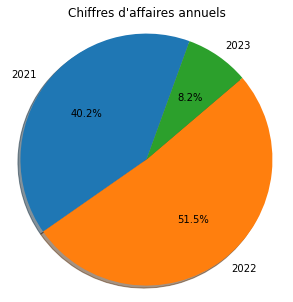

In [54]:
# Affichage du graphique (camembert) du chiffre d'affaire réalisé par année
fig=plt.figure(figsize = (5, 5))
explode = (0,0,0) # explode "Alimentation des touristes"
plt.pie(o['chiffre_affaire'],explode= explode,labels=['2021','2022','2023'],autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Chiffres d\'affaires annuels')
plt.axis('equal')
plt.show()


#### C. CHIFFRES D'AFFAIRES MENSUELS

In [55]:
# Afficher le chiffre d'affaire mensuel
chiff_affai_mensuel=join2['price'].resample('M').agg(['sum']).reset_index()
chiff_affai_mensuel.rename(columns ={"sum": "chiffre_affaire"},inplace =True)
chiff_affai_mensuel.head()

,date,chiffre_affaire
0,2021-03-31,482440.61
1,2021-04-30,476109.30
2,2021-05-31,492943.47
3,2021-06-30,484088.56
4,2021-07-31,482835.40


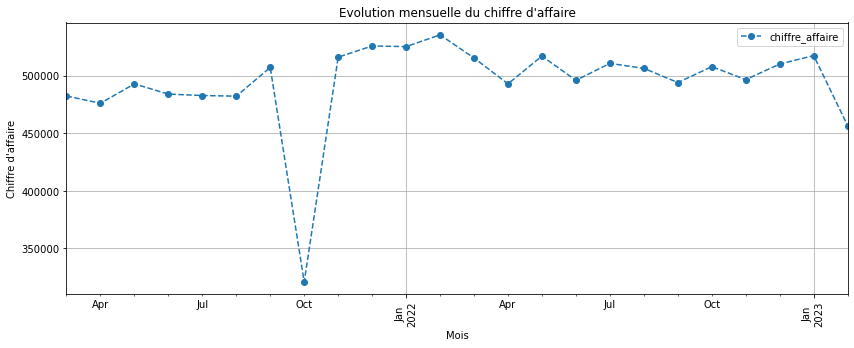

In [56]:
chiff_affai_mensuel.plot(x='date', y='chiffre_affaire',linestyle = 'dashed',marker = 'o')
plt.xticks(rotation='vertical')
plt.title('Evolution mensuelle du chiffre d\'affaire')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaire')
plt.gcf().set_size_inches(14, 5)
plt.grid()
#plt.savefig('image.png', transparent = True)
plt.show()

### VERIFICATION DES VALEURS ABERRANTES
##### Résultats et Interprétation
   - Au vu du graphique ci-dessous la valeur du chiffre d'affaire du mois d'octobre semble être une valeur abérrante.
   - Au vu de l'histograme ci-dessous la distribution des valeurs des chiffres d'affaires mensuels est étalée à gauche avec une valeur (octobre 2021) complétement décalée du reste des valeurs
   - Au vu de la boite à moustache ci-dessous la valeur du mois d'octobre est effectivement en dehors de extrimité gauche de la moustache
   - Calculer l'indicateur d'asymétrie de la ditribution avec le skew = -3.42
   - Calculer du z-score = -4.20 pour le mois d'octobre 2021, le décalage par rapport à la moyenne est très important
   - Analyser le chiffre d'affaire du mois d'octobre et par catégorie de produits chiffre_affaire : cat 0 : 62% (199251€), cat 1 : 11% (33762€), cat 3 : 27% (87786€)	
   

###### Conclusion
  - Le chiffre d'affaire du mois d'octobre semble anormalement bas au vu des autres mois et constitue un outlier qui pourrait biaiser nos analyses.
  - Par conséquent cette valeur est supprimée
  - La catégorie 1 en particulier et la catégorie 2 présentent un chiffre d'affaire très bas, cela est probablement à l'origine du chiffre d'affaire anormalement bas, les raisons sont à explorer, mais nous pouvons emettre une hypothèse de rupture des stocks de ce produits là.


#### LA FORME DE DISTRIBUTION
 

In [57]:
# Calculer la symertie de la distribution
chiff_affai_mensuel['chiffre_affaire'].skew()

-3.4232517039873103

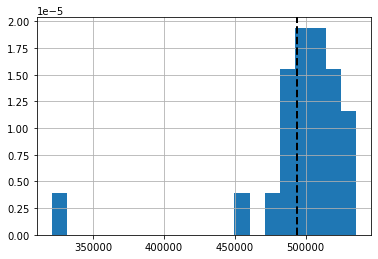

In [58]:
chiff_affai_mensuel['chiffre_affaire'].hist(density=True,bins=20)
plt.axvline(chiff_affai_mensuel['chiffre_affaire'].mean(), color='k', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'figure 2 : Représentation de la distribution des valeurs chiffre_affaire')

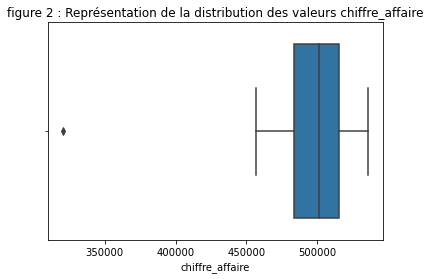

In [59]:
# Affichage d'une boite à moustache representant la distribution de la valeur chiffre d'affaire
sns.boxplot(x=chiff_affai_mensuel['chiffre_affaire'] )
plt.title('figure 2 : Représentation de la distribution des valeurs chiffre_affaire')

#### Calculer le nombre d'écart-type par rapport à la moyenne =  z-score

In [60]:
# Calculer le z-score 
chiff_affai_mensuel['z_score']=(chiff_affai_mensuel['chiffre_affaire']-chiff_affai_mensuel['chiffre_affaire'].mean())/chiff_affai_mensuel['chiffre_affaire'].std()
chiff_affai_mensuel.head(20)

,date,chiffre_affaire,z_score
0,2021-03-31,482440.61,-0.278212
1,2021-04-30,476109.30,-0.431852
2,2021-05-31,492943.47,-0.023342
3,2021-06-30,484088.56,-0.238221
4,2021-07-31,482835.40,-0.268631
5,2021-08-31,482284.79,-0.281993
6,2021-09-30,507240.68,0.323604
7,2021-10-31,320798.74,-4.200726
8,2021-11-30,516167.73,0.540234
9,2021-12-31,525917.28,0.776824


<AxesSubplot:>

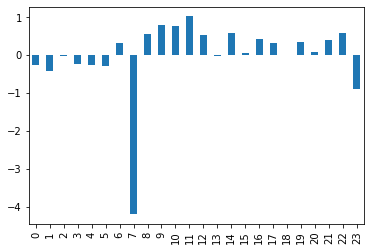

In [61]:
# representation graphique du z-score
chiff_affai_mensuel['z_score'].plot.bar()

### Analyser le chiffre d'affaire du mois d'octobre par catégorie de produits

In [62]:
# Calculer les chiffres d'affaire pour le mois d'octobre et par catégorie
raison=round(join2[join2.index.strftime('%Y-%m') == '2021-10'].groupby('categ')['price'].agg(['sum']))
raison.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
raison.head()

,chiffre_affaire
categ,
0,199251.0
1,33762.0
2,87786.0


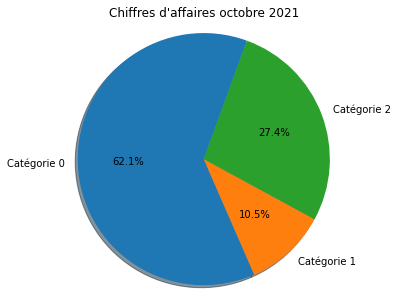

In [63]:
# Affichage du graphique (camembert) du chiffre d'affaire réalisé par année
fig=plt.figure(figsize = (5, 5))
explode = (0,0,0) # explode "Alimentation des touristes"
plt.pie(raison['chiffre_affaire'],explode= explode,labels=['Catégorie 0','Catégorie 1','Catégorie 2'],autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Chiffres d\'affaires octobre 2021')
plt.axis('equal')
plt.show()

In [64]:
# afficher un graph du mois d'octobre par jour
oct_jour=join2[join2.index.strftime('%Y-%m') == '2021-10'].reset_index()
oct_jour['date2']= oct_jour['date'].dt.strftime('%d-%m-%Y')
oct_jour.head(5)

,date,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,date2
0,2021-10-23 21:58:50.700370,0_1518,s_109153,c_6714,f,1968,4.18,0,2021,10,21,Saturday,23-10-2021
1,2021-10-13 18:00:08.691379,0_1518,s_104281,c_1609,m,1980,4.18,0,2021,10,18,Wednesday,13-10-2021
2,2021-10-18 05:08:38.451377,0_1518,s_106465,c_1609,m,1980,4.18,0,2021,10,5,Monday,18-10-2021
3,2021-10-06 02:28:00.146255,0_1518,s_100641,c_6726,f,1974,4.18,0,2021,10,2,Wednesday,06-10-2021
4,2021-10-12 07:31:49.081831,0_1518,s_103594,c_846,f,1981,4.18,0,2021,10,7,Tuesday,12-10-2021


#### Explorer l'évolution du nombre de commandes journalier pour les 3 catégories

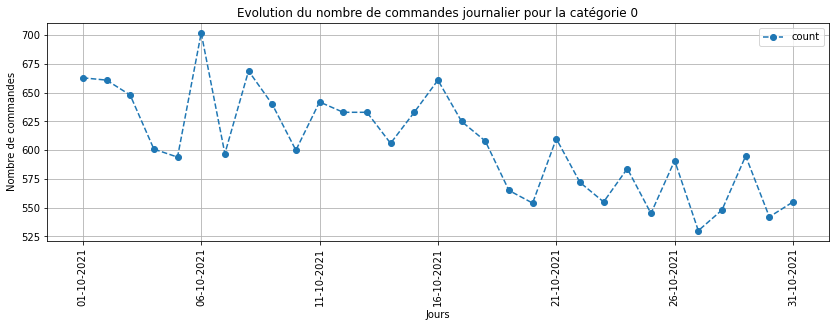

In [78]:
# Afficher le graphique du nombre de commandes par jour pour la catégorie 0
plt.rcParams["figure.figsize"] = (14,4)
oct_jour.loc[oct_jour.categ==0, ['date2','categ']].groupby('date2')['categ'].agg(["count"]).plot(linestyle = 'dashed',marker = 'o')
plt.xticks(rotation='vertical')
plt.title('Evolution du nombre de commandes journalier pour la catégorie 0')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.grid()
plt.show()

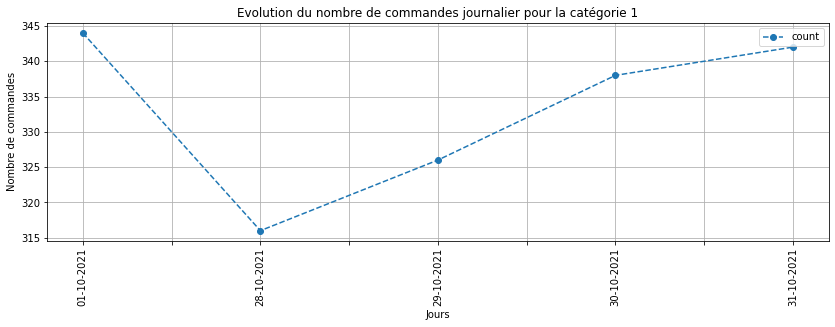

In [79]:
# Afficher le graphique du nombre de commandes par jour pour la catégorie 1
plt.rcParams["figure.figsize"] = (14,4)
oct_jour.loc[oct_jour.categ==1, ['date2','categ']].groupby('date2')['categ'].agg(["count"]).plot(linestyle = 'dashed',marker = 'o')
plt.xticks(rotation='vertical')
plt.title('Evolution du nombre de commandes journalier pour la catégorie 1')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.grid()
plt.show()

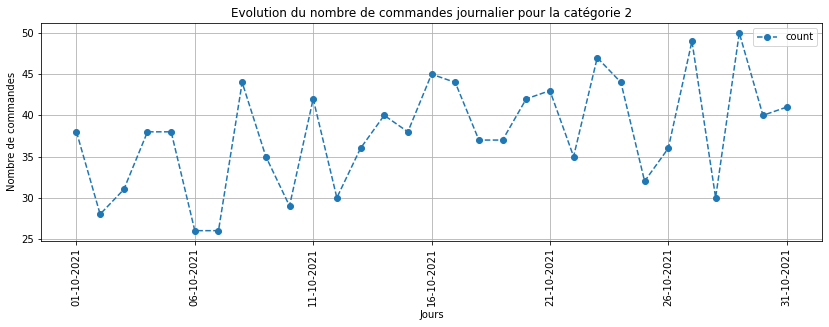

In [80]:
# Afficher le graphique du nombre de commandes par jour pour la catégorie 2
plt.rcParams["figure.figsize"] = (14,4)
oct_jour.loc[oct_jour.categ==2, ['date2','categ']].groupby('date2')['categ'].agg(["count"]).plot(linestyle = 'dashed',marker = 'o')
plt.xticks(rotation='vertical')
plt.title('Evolution du nombre de commandes journalier pour la catégorie 2')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.grid()
plt.show()

### Suppression des valeurs du chiffre d'affaire du mois d'octobre 2021 (outlier)

In [81]:
# Afficher le df du chiffres d'affaires mensuels sans le chiffre d'affaire d'octobre
t= chiff_affai_mensuel[chiff_affai_mensuel.date !='2021-10-31']
t.head(10)

,date,chiffre_affaire,z_score
0,2021-03-31,482440.61,-0.278212
1,2021-04-30,476109.30,-0.431852
2,2021-05-31,492943.47,-0.023342
3,2021-06-30,484088.56,-0.238221
4,2021-07-31,482835.40,-0.268631
5,2021-08-31,482284.79,-0.281993
6,2021-09-30,507240.68,0.323604
8,2021-11-30,516167.73,0.540234
9,2021-12-31,525917.28,0.776824
10,2022-01-31,525338.99,0.762790


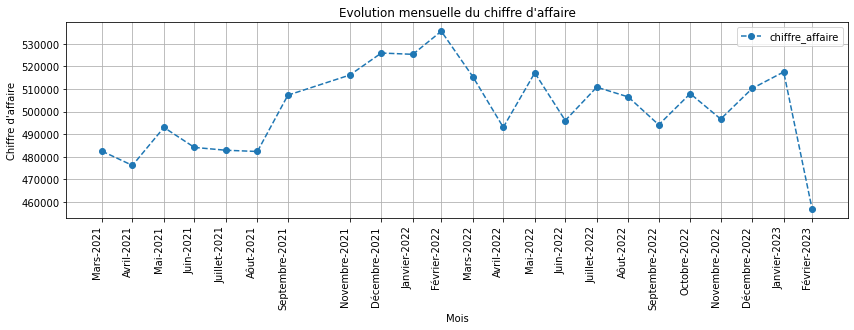

In [82]:
mois=['Mars-2021','Avril-2021','Mai-2021','Juin-2021','Juillet-2021','Aôut-2021','Septembre-2021','Novembre-2021','Décembre-2021','Janvier-2022','Février-2022','Mars-2022','Avril-2022','Mai-2022','Juin-2022','Juillet-2022','Aôut-2022','Septembre-2022','Octobre-2022','Novembre-2022','Décembre-2022','Janvier-2023','Février-2023']
t.plot(x='date', y='chiffre_affaire',linestyle = 'dashed',marker = 'o')
plt.xticks(t['date'],mois,rotation='vertical')
plt.title('Evolution mensuelle du chiffre d\'affaire')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaire')
plt.gcf().set_size_inches(14, 4)
plt.grid()
#plt.savefig('image.png', transparent = True)
plt.show()
plt.savefig('image.png'); plt.close()

In [83]:
# Vérification de l'asymétrie de la distribution
t['chiffre_affaire'].skew()

-0.3662836480063725

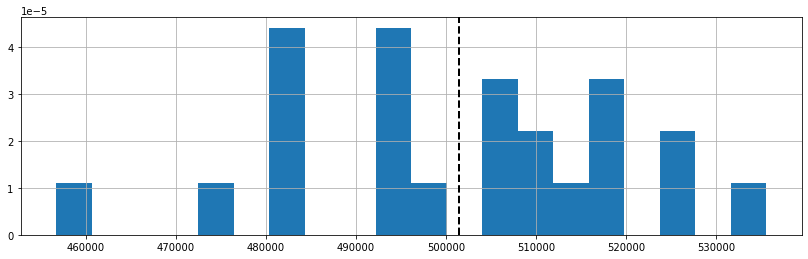

In [84]:
# Afficher l'histograme des valeurs après avoir supprimé le outlier (mois d'octobre)
t['chiffre_affaire'].hist(density=True,bins=20)
plt.axvline(t['chiffre_affaire'].mean(), color='k', linestyle='dashed', linewidth=2)

##### Résultats :
- Chiffre d'affaire total :11853728€
- Chiffres d'affaires annuels : 2021 = 40.2%, 2022 = 51.5%, 2023 = 8.2%   (2021 et 2023 sont incomplètes)
- Chiffre d'affaire du mois d'octobre (320798€)est anormalement bas, nous le considérons comme outlier et le supprimons pour ne pas biaiser nos analyses :
   - Cat0 : 62% (199251€)
   - Cat1 : 11% (33762€) correspond à seulement 5 jours de commandes
   - Cat2 : 27% (87786€)
   
##### Interprétation :

- La catégorie 1 en particulier et la catégorie 2 présentent un chiffre d'affaire très bas, cela est probablement à l'origine du chiffre d'affaire anormalement bas, les raisons sont à explorer, mais nous pouvons emettre une hypothèse de rupture de stock.

###### Evolution du chiffre d'affaire mensuel
- Période 03/2021-08/2021 : un chiffre d'affaire relativement stable oscillant entre 476109.30€ et 492943.47€
- Période 09/2021-02/2022 : un chiffre d'affaire en augmentation constante de 507240.68€ à 535571.50€
- Période 03/2022-02/2023 : un chiffre d'affaire oscillant entre 517132.60€ et 456679.76€, fin des relevés de chiffres d'affaires
- Le faible chiffre d’affaire de la catégorie 1 est dû au grand nombre de jours durant lesquels il n’y a eu aucune commande

------
### 2. REPARTITION DU CHIFFRE D'AFFAIRE PAR CATEGORIE DE PRODUITS
------
##### Démarche :

- Exclure les valeurs du mois d'octobre 2021 du dataset initial
- Calculer les proportions de chiffre d'affaire pour chaque catégorie
- Afficher une représentation graphique des résultats en utilisant un camembert

In [85]:
#Afficher le dataframe sans les valeurs du mois d'octobre 2021 
analyse=join2[join2.index.strftime('%Y-%m') != '2021-10']
analyse.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday


In [86]:
# Nombre de vente par catégorie
nombre_vente=round(analyse.groupby('categ')['price'].agg(['count']))
nombre_vente.rename(columns ={"count": "nombre_vente"}, inplace= True)
nombre_vente.head()

,nombre_vente
categ,
0,396697
1,225503
2,35312


In [87]:
ch_cat=round(analyse.groupby('categ')['price'].agg(['sum']))
ch_cat.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
ch_cat.head()

,chiffre_affaire
categ,
0,4220480.0
1,4619960.0
2,2692489.0


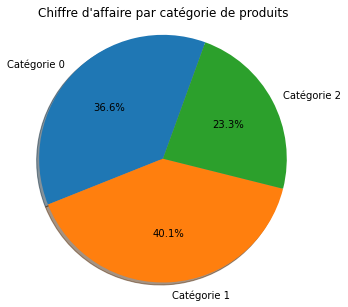

In [88]:
# Affichage du graphique (camembert) du chiffre d'affaire réalisé par année
plt.figure(figsize = (5, 5))
explode = (0,0,0) # explode "Alimentation des touristes"
plt.pie(ch_cat['chiffre_affaire'],explode= explode,labels=['Catégorie 0','Catégorie 1','Catégorie 2'],autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Chiffre d\'affaire par catégorie de produits')
plt.axis('equal')
plt.show()

##### Résultats

    - Les catégories de produits peuvent être classées sur la période 03/2021 à 02/2023 en fonction du chiffre d'affaire              généré comme ci-dessous :
        a- Catégorie 0 --> 4220480€ (36.6%)
        b- Catégorie 1 --> 4619960€ (40.1%)
        c- Catégorie 2 --> 2692489€ (23.3%)

##### Inteprétation :
Le chiffre d'affaire par catégorie dans l'ordre croissant : cat2 ==> cat0 ==> cat1

##### Conclusion :
Les produits de la cétégorie 1 sont les plus vendus

------
## 3. REPARTITION DU CHIFFRE D'AFFAIRE PAR GENRE DU CLIENT
------
##### Démarche :

- Calculer la répartition du chiffre d'affaire par sex
- Calculer la répartition du chiffre d'affaire par sex et catégorie de produits 
- Représenter graphiquement les résultats


In [89]:
ch_sex=round(analyse.groupby('sex')['price'].agg(['sum']))
ch_sex.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
ch_sex.head()

,chiffre_affaire
sex,
f,5704395.0
m,5828535.0


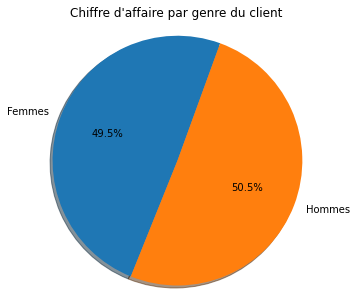

In [90]:
# Affichage du graphique (camembert) du chiffre d'affaire réalisé par année
plt.figure(figsize = (5, 5))
explode = (0,0) # explode "Alimentation des touristes"
plt.pie(ch_sex['chiffre_affaire'],explode= explode,labels=['Femmes','Hommes'],autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Chiffre d\'affaire par genre du client')
plt.axis('equal')
plt.show()

#### Répartition du chiffre d'affaire entre les femmes et les hommes par catégories de produits

In [91]:
#Méthode .pivot_table() pour affiner davantage la répartition des hommes et des femmes selon la catégorie d'achat
#Utilisation de df (étape suivante)obtenu par jointure avec df_customers et df_transactionsv1_products
fem_hom = round(analyse.groupby(['sex', 'categ'])['price'].agg(['sum']))
fem_hom.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
fem_hom['sex']=fem_hom.index
fem_hom.head(6)

chiffre_affaire     sex
sex categ                         
f   0            2093117.0  (f, 0)
    1            2341981.0  (f, 1)
    2            1269296.0  (f, 2)
m   0            2127363.0  (m, 0)
    1            2277979.0  (m, 1)
    2            1423193.0  (m, 2)

In [92]:
fem_hom['chiffre_affaire'].sum()

11532929.0

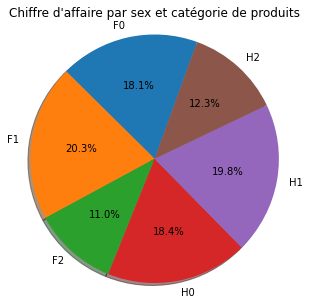

In [93]:
# Affichage du graphique (camembert) du chiffre d'affaire par sexet catégorie
plt.figure(figsize = (5, 5))
explode = (0,0,0,0,0,0) # explode "Alimentation des touristes"
plt.pie(fem_hom['chiffre_affaire'],explode= explode,labels=['F0','F1','F2','H0','H1','H2'],autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Chiffre d\'affaire par sex et catégorie de produits')
plt.axis('equal')
plt.show()

##### Résultats :
- Le chiffre d'affaire par genre de client sur la période de référence 03/2021 à 02/2023 se presente comme ci-dessous :
     - FEMMES --> 4619960€ (49.5%)
     - HOMMES --> 4220480€ (50.5%)
- Le chiffre d'affaire par genre et catégorie de produits
     - FEMMES :
         - CAT0 --> 2093117€ (18.1 %)
         - CAT1 --> 2341981€ (20.3 %)
         - CAT2 --> 1269296€ (11 %)
     - HOMMES :
        - CAT0 --> 2127363€ (18.4 %)
        - CAT1 --> 2277979€ (19.8 %)
        - CAT2 --> 1423193€ (12.3 %)
        
##### Interprétation :
- La répartition du chiffre d'affaire est quasiment identique entre les hommes et les femmes, et c'est le cas également pour la répartition par sex et catégorie

### 4. LISTE DES CLIENTS QUI ONT GENERES LE PLUS DE CHIFFRE D'AFFAIRE 

##### Démarche :

- Filtrer les clients par montant du chiffre d'affaire généré

In [94]:
# afficher les 10 meilleurs clients en terme de chiffre d'affaire généré
top_clients=analyse.groupby('client_id')['price'].agg(['sum'])
top_clients.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
top_clients.sort_values(by='chiffre_affaire' , ascending = False).head(10)

,chiffre_affaire
client_id,
c_1609,312755.08
c_4958,282654.61
c_6714,149783.75
c_3454,111766.71
c_2899,5214.05
c_1570,5136.14
c_3263,5129.89
c_7319,5120.55
c_8026,4969.41


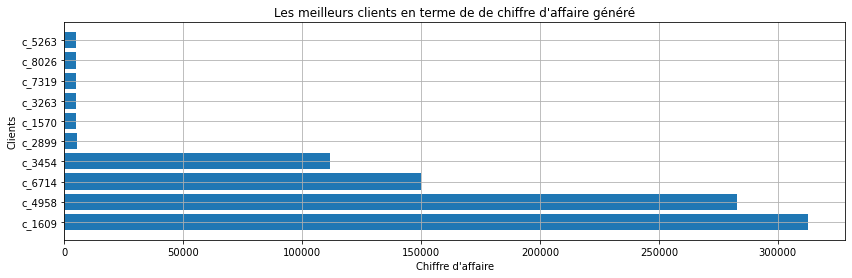

In [95]:
# générer un graphique barplot pour illutrer les 10 meilleurs clients
tp=top_clients.sort_values(by='chiffre_affaire' , ascending = False).head(10)
plt.figure(figsize = (14, 4))
height =tp.	chiffre_affaire
bars =  tp.index
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
plt.grid()
plt.title("Les meilleurs clients en terme de de chiffre d\'affaire généré")
plt.xlabel('Chiffre d\'affaire')
plt.ylabel("Clients")
plt.show()

##### Interprétation :

- 4 meilleurs clients génèrent des chiffres d'affaires très élevés :
    - c_1609 : 312755€ 
    - c_4958 : 282654€
    - c_6714 : 149783€
    - c_3454 : 111766€

-----
## 4. LES REFERENCES LES PLUS/MOINS VENDUES
-----
#### Démarche :

- Lister les produits qui se sont le mieux vendus.
- Lister les produits qui se sont le moins bien vendus.


### Les produits qui se sont le mieux vendus

In [96]:
# Afficher les produits qui se sont le mieux vendus par nombre de commandes 
top_vente=analyse.groupby('id_prod')['price'].agg(['count'])
top_vente.rename(columns ={"count": "nombre_commande"}, inplace= True)
top_vente.sort_values(by='nombre_commande' , ascending = False).head(10)


,nombre_commande
id_prod,
1_369,2237
1_417,2173
1_414,2166
1_498,2117
1_425,2084
1_403,1950
1_412,1938
1_413,1931
1_406,1931


### Les produits qui se sont le moins bien vendus

In [97]:
# Afficher les produits qui se sont le moins vendus  
top_vente.sort_values(by='nombre_commande' , ascending = True).head(10)


,nombre_commande
id_prod,
0_1151,1
0_898,1
0_886,1
0_833,1
0_807,1
2_23,1
0_1498,1
0_541,1
0_1533,1


In [98]:
# Afficher les produits qui se sont vendus à moins de 50 exemplaires
top_vente[top_vente['nombre_commande']<50].count()

nombre_commande    1580
dtype: int64

##### Résultat :

###### 10 produits les mieux vendus:
(1_369, 1_417, 1_41, 1_498, 1_425, 1_403, 1_412, 1_413, 1_406, 1_407)
###### 10 produits les moins bien vendus:
(0_1151, 0_898, 0_886, 0_833, 0_807, 2_23, 0_1498, 0_541, 0_1533, 0_1539)
- 1580 produits se sont vendus à moins de 50 exemplaires

##### Interprétation et Conclusion :

- Il semnlerait que les produits qui ont le plus de succès appartiennent à la catégrie 1
- Il sembelrait également que les produits qui se sont le moins vendus appartiennent à la catégorie 0
- 1580 produits commandés à moins de 50 exemplaires sur toute la période 2021, 2022 et 2023


------
## 5. REPARTITION DU CHIFFRE D'AFFAIRE ENTRE LES CLIENTS
------
##### Démarche :

- Pour illuster la répartition du chiffre d'affaire entre les clients nous utiliserons une courbe de lorenz
- Calculer l'indice gini

In [99]:
# afficher un dataset du chiffre d'affaire par client
repart_par_client=analyse.groupby('client_id')['price'].agg(['sum'])
repart_par_client.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
repart_par_client.head()

,chiffre_affaire
client_id,
c_1,550.19
c_10,1353.60
c_100,254.85
c_1000,2209.92
c_1001,1720.08


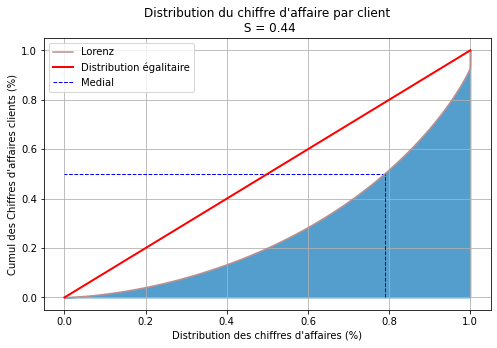

In [100]:

#Courbe de Lorenz sur la variable des âges 
fig, ax = plt.subplots(figsize=[8,5])
dep = repart_par_client['chiffre_affaire'].values
# Sélection du sous-échantillon de travail que l'on appelle dep

#On place les observations dans une variable
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz)) ,lorenz , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.79, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.79, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Distribution du chiffre d\'affaire par client\n S = 0.44')
plt.xlabel("Distribution des chiffres d\'affaires (%)")
plt.ylabel("Cumul des Chiffres d\'affaires clients (%)")

plt.legend(loc="best")
#plt.savefig("p6_graphic/lorenz_ca.png")
plt.grid()
plt.show()


In [101]:
# Calculer l'indice de gini
n=len(dep)
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4473981710517282

##### Résultats
- Indice de gini : 0.44

##### Interprétation

- indice de gini élevé
- 50% du chiffre d'affaire pour 79% des clients
- 21% des clients restants représentent les 50% du chiffre d'affaire restant


##### Conclusion

La répartition du montant du chiffre d'affaire n'est pas égalitaire entre les client puisque seulement 21% des clients ont dépensés 50% du CA

------
------
## 6. ANALYSE DES CORRELATIONS
------

------
### A. LIEN ENTRE LE GENRE DU CLIENT ET LA CATEGORIE DE LIVRES ACHETES
-----
-----
##### Démarche :

##### Rechercher une éventuelle association entre ces 2 variables en utilisant le test  CHI 2

Pour cela émettons les 2 hypothèse du test:

- Hypothèse nulle H0 : il n'existe pas d'association entre la variable sex et la variable catégorie de produit ==> ces 2 variables sont indépendantes
- Hypohtèse H1 : il existe une association entre la variable âge et la variable catégorie de produit ==> ces 2 variables sont dépendantes
- Degré de liberté calculé = 2
- Valeur critique du chi 2 observé est calculé haut dela de laquelle l'hypotuèse nulle H0 sera rejeter : une valeur de chi 2 seuil corespondant à une erreur strandard de α = 5% avec un degrès de liberté de 2 donc chi2 seuil = 5.99



#### 2 VARIABLES QUALITATIVES

In [102]:
# Afficher le tableau de contingence (resultats observés) des 2 variables 'sex' et 'catégorie'
gen_cat=analyse.pivot_table( index= 'sex', columns = 'categ', values='price', aggfunc = len,margins=True, margins_name="Total").fillna(0)
gen_cat.head()

categ,0,1,2,Total
sex,,,,
f,196986.0,114087.0,16722.0,327795.0
m,199711.0,111416.0,18590.0,329717.0
Total,396697.0,225503.0,35312.0,657512.0


In [103]:
# Afficher le tableau de contingence (résultats observés) sans les totaux
gen=analyse.pivot_table( index= 'sex', columns = 'categ', values='price', aggfunc = len).fillna(0)
gen.head()

categ,0,1,2
sex,,,
f,196986.0,114087.0,16722.0
m,199711.0,111416.0,18590.0


### Calcule du critère du test khi 2 observé 

In [104]:
# Afficher les valeurs de : chi2 observé, p-value, degré de liberté, les resultas attendus
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(gen)
print('chi2 observé :', st_chi2,'\np-value :',st_p,'\ndegré de liberté :',st_dof,'\nresultas attendus :',st_exp)

chi2 observé : 143.5555396400573 
p-value : 6.719092869603587e-32 
degré de liberté : 2 
resultas attendus : [[197768.69945339 112421.91151644  17604.38903016]
 [198928.30054661 113081.08848356  17707.61096984]]


In [105]:
# comparaison de la p-value à la valeur d'erreur standard
st_p < 0.05

True

##### Resultat

- chi2 seuil = 5.99
- p-value extrêmement petite < α = 5% 
- chi2 observé = 143.55 largement superieur au chi2 seuil

##### Conclusion

- La valeur de p-value obtenue est inferieur à la valeur d'erreur standard de 5%
- Le chi2 oservé est largement superieur au khi2 seuil, on peut par conséquent rejeter l'hypothèse H0
- On peut conclure qu'il y'a bien une association (dépendance) entre la variable sexe et la catégorie des produits achetés



-----
-----
### B. LE LIEN ENTRE L'AGE DES CLIENTS ET LE MONTANT TOTAL DES ACHATS
-----
-----
##### Démarche :

- Création d'une colonne âge.
- Création d'un dataset en filtrant par âge et aggrégation en appliquant la somme de la variable price. 
- Calculer le coefficient de corrélation (Pearson) pour vérifier une éventuelle corrélation entre l'âge des clients et le montant total des achats.
- Calculer également le coefficient de spearman
- Vérification graphique d'une éventuelle corrélation entre la variable âge et le montant total des achats.

In [106]:
# Créer une colonne age
analyse['age']=analyse['année']-analyse['birth']
analyse['age'] = analyse['age'].astype('float')
analyse.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,age
date,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday,36.0
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday,35.0
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday,36.0
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday,53.0
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday,54.0


In [107]:
analyse.isnull().sum()

id_prod       0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
année         0
mois          0
heure         0
jour          0
age           0
dtype: int64

In [108]:
age_ca=analyse.groupby('age')['price'].agg(['sum'])
age_ca.rename(columns ={"sum": "montant_achat"}, inplace= True)
age_ca['age']=age_ca.index
age_ca.head()

,montant_achat,age
age,,
17.0,223666.37,17.0
18.0,379228.40,18.0
19.0,216489.94,19.0
20.0,172955.24,20.0
21.0,167638.98,21.0


##### Utilisation d'un indicateur numérique : coefficient de corrélation (Pearson) pour vérifier une éventuelle corrélation entre l'âge des clients et le montant total des achats 

In [109]:
# Calculer le coefficient de corrélation (Pearson)
age_ca.corr()

,montant_achat,age
montant_achat,1.000000,-0.855734
age,-0.855734,1.000000


In [110]:
# Calculer le coéfficient de Spearman
age_ca['montant_achat'].corr(age_ca['age'],method='spearman')

-0.8708633139012885

#### Vérification avec un diagramme de dispersion 

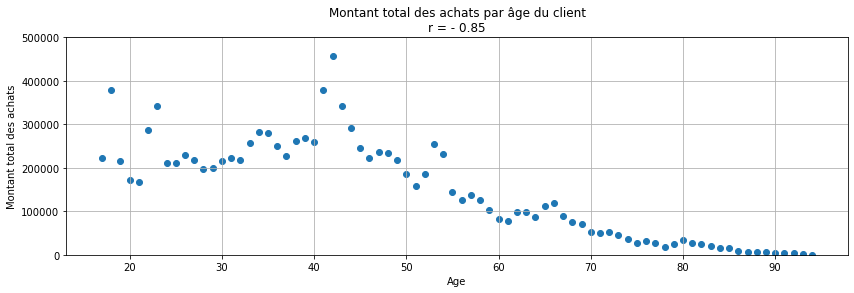

In [111]:
# Afficher un graphique du chiffre d'affaire en fonction du prix produit
plt.figure(figsize = (14, 4))
plt.scatter(age_ca['age'],age_ca['montant_achat'])
plt.ylim(0, 500000)
plt.title("Montant total des achats par âge du client\nr = - 0.85")
plt.xlabel('Age')
plt.ylabel("Montant total des achats")
plt.grid()
plt.show()

##### Résultat :

- Le coefficient de corrélation (Pearson) r = -0.85
- Le coefficient de Spearman = -0.87 
- Le graphique de dispersion indique une relation liniaire entre ces 2 variables

##### Conclusion :

Les 2 variables étudiées, présentent une forte corrélation négative, à savoir le montant total des achats diminue avec l'augmentation de l'âge avec une tendance linéaire et monotone

----
----
### C. LE LIEN ENTRE L'AGE DES CLIENTS ET LA FREQUENCE D'ACHAT
----
----
##### Démarche :
- Création d'un dataset fréquence d'achat par âge du client 
- Utilisation de la fonction corr() pour calculer le coefficient de corrélation (Pearson) et spearman pour vérifier une éventuelle corrélation entre l'âge des clients et la fréquence des achats.
- Vérification graphique d'une éventuelle corrélation entre la variable âge et la fréquence des achats.

In [112]:
u=analyse.groupby('age')[['session_id']].count() / analyse['session_id'].count()
u.rename(columns ={"session_id": "frequence_achat"}, inplace= True)
u['age']=u.index
u.head()

,frequence_achat,age
age,,
17.0,0.008449,17.0
18.0,0.014453,18.0
19.0,0.008044,19.0
20.0,0.006599,20.0
21.0,0.006371,21.0


In [113]:
# Calculer le coefficient de corrélation (Pearson)
u.corr()

,frequence_achat,age
frequence_achat,1.000000,-0.555721
age,-0.555721,1.000000


In [114]:
# Calculer le coéfficient de Spearman
u['frequence_achat'].corr(u['age'],method='spearman')

-0.7020953729814489

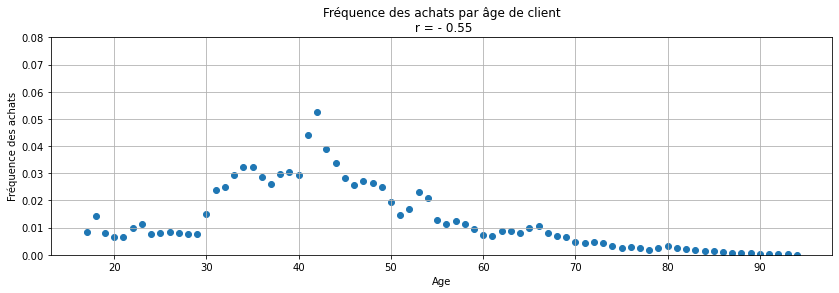

In [115]:
# Afficher le graphique de dispersion de la fréquence des achats par âge de client
plt.figure(figsize = (14, 4))
plt.scatter(u['age'],u['frequence_achat'])
plt.ylim(0, 0.08)
plt.title("Fréquence des achats par âge de client\n r = - 0.55")
plt.xlabel('Age')
plt.ylabel("Fréquence des achats")
plt.grid()
plt.show()

##### Résultat :

- Le coefficient de corrélation (Pearson) r = - 0.55 , on constate qu'il est négatif
- Le coefficient de corrélation de Spearman = - 0.70 , on constate également qu'il est négatif
- Comme on peut le voir sur le nuage de dispersion, les données ne suivent pas une tendance linéaire 

##### Conclusion :

Nous pouvons conclure que cette distribution suit une tendance monotone, non linéaire avec une corrélation négative entre l'âge et la fréquence d'achat

-----
-----
### D. LE LIEN ENTRE L'AGE DES CLIENTS ET  LA TAILLE DU PANIER MOYEN
-----
-----
##### Démarche :

- Création d'un dataframe en filtrant par âge et aggrégation en appliquant la moyenne de la variable price. 
- Utilisation de la fonction corr() pour calculer le coefficient de corrélation (Pearson) pour vérifier une éventuelle corrélation entre l'âge des clients et la taille du panier moyen.
- Vérification graphique d'une éventuelle corrélation entre la variable âge et la taille du panier moyen.

In [116]:
analyse.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,age
date,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday,36.0
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday,35.0
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday,36.0
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday,53.0
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday,54.0


In [117]:
#h=analyse.groupby(['age'])[['price']].mean()
h = analyse.groupby(['client_id', 'age'])[['price']].count().groupby(level="age").mean()
h.rename(columns ={"price": "taille_panier_moyen"}, inplace= True)
h['age']=h.index
h.head()

,taille_panier_moyen,age
age,,
17.0,12.770115,17.0
18.0,16.555749,18.0
19.0,8.713344,19.0
20.0,11.822888,20.0
21.0,11.766854,21.0


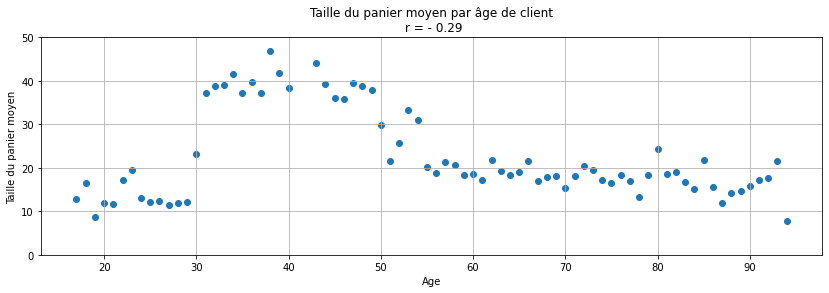

In [118]:
# Afficher le graphique de dispersion de la fréquence des achats par âge de client
plt.figure(figsize = (14, 4))
plt.scatter(h['age'],h['taille_panier_moyen'])
plt.ylim(0, 50)
plt.title("Taille du panier moyen par âge de client\n r = - 0.29")
plt.xlabel('Age')
plt.ylabel("Taille du panier moyen")
plt.grid()
plt.show()

##### Etudier la répartition de ces 2 variables séparément avec des histogrammes 

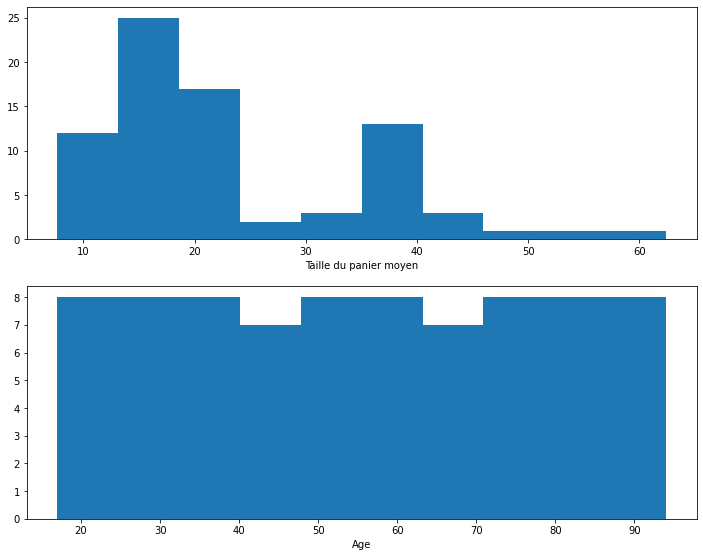

In [119]:
plt.figure(figsize=(12, 400))
plt.grid()
plt.subplot(78,1,1)
plt.hist(h['taille_panier_moyen'])
plt.xlabel('Taille du panier moyen')
plt.subplot(78,1,2)
plt.hist(h['age'])
plt.xlabel('Age')
plt.show()

In [120]:
# Calculer le coéfficient de corrélation Pearson
h.corr()

,taille_panier_moyen,age
taille_panier_moyen,1.000000,-0.292222
age,-0.292222,1.000000


In [121]:
# Calculer le coéfficient de corrélation Spearman
h['age'].corr(h['taille_panier_moyen'],method='spearman')

-0.1692105362991439

In [122]:
h['age'].corr(h['taille_panier_moyen'],method='kendall')

-0.20679320679320679

##### Résultat :

- Une bonne répartition de la variable âge
- Une asymétrie évidente de la distribution de la variable taille du panier avec 2 concentration 10€-20€ et 40€-42€ 
- Le coefficient de corrélation (Pearson) r = - 0.29, on constate également qu'il est négatif
- Le coefficient de corrélation de Spearman = - 0.16 , on constate également qu'il est négatif 
- Comme on peut le voir sur le nuage de dispersion, les données ne suivent pas une tendance linéaire 

##### Interprétation :

- Les 2 variabes âge et taille du panier moyen ne présentent une relation non liniaire
- La relation est également non monotone

##### Conclusion :

Nous pouvons conclure que cette distribution suit une tendance non monotone, non linéaire avec une corrélation négative entre l’âge et la taille du panier moyen.

-----
-----
### E. LE LIEN ENTRE L'AGE DES CLIENTS ET  LA CATEGORIE DE LIVRES ACHETES
-----
-----

##### Démarche :
 - Analyse graphique : la forme des distributions, les moyennes
 - Analyse de la variance  :
     - Un test statistique de l'égalité des moyennes (ANOVA)
     - tester la significativité pour le facteur considéré ?
     - Hypothèse nulle H0 : égalité des moyennes des 3 catégories de produits
     - Hypothèse inverse H1 : non égalité des moyennes
 - Donc ici nous allons évaluer l'homogénéité de la moyenne par l'analyse de la variance

In [123]:
d=pd.crosstab(analyse['age'], analyse['categ'])

d.head()

categ,0,1,2
age,,,
17.0,1265,2102,2188
18.0,2059,3705,3739
19.0,1111,2020,2158
20.0,957,1676,1706
21.0,989,1562,1638


In [124]:
# calculer la moyenne d'age pour chaque catégorie
analyse.groupby('categ')['age'].agg(['mean'])

,mean
categ,
0,43.585391
1,47.357645
2,25.650912


##### Etudier la répartition de ces 2 variables séparément avec des histogrammes 

<Figure size 648x432 with 0 Axes>

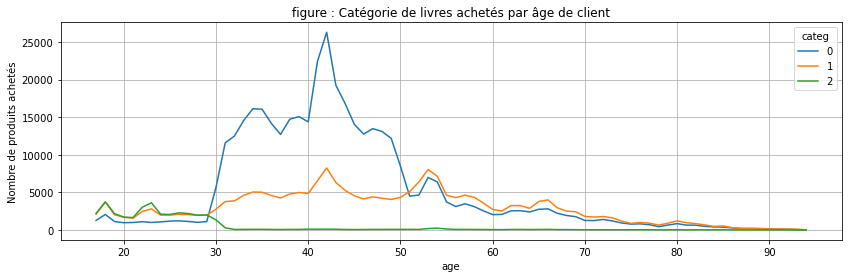

In [125]:
plt.figure(figsize = (9, 6))
d.plot()
plt.title('figure : Catégorie de livres achetés par âge de client')
plt.ylabel('Nombre de produits achetés')
plt.grid()

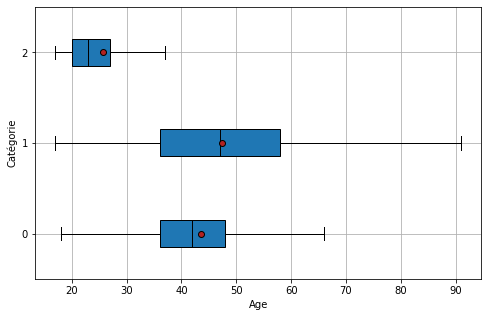

In [126]:
X='categ'
Y='age'
modalites = analyse[X].unique()
groupes = []
for m in modalites:
    groupes.append(analyse[analyse[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize = (8, 5))   
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Age')
plt.ylabel("Catégorie")
plt.grid()
plt.show()

In [127]:
cat0=analyse['age'][analyse['categ']==0]
cat1=analyse['age'][analyse['categ']==1]
cat2=analyse['age'][analyse['categ']==2]

In [128]:
# vérifier l'asymétrie de la distribution de la variable âge pour la catégorie 0
cat0.skew()

1.0043134381319176

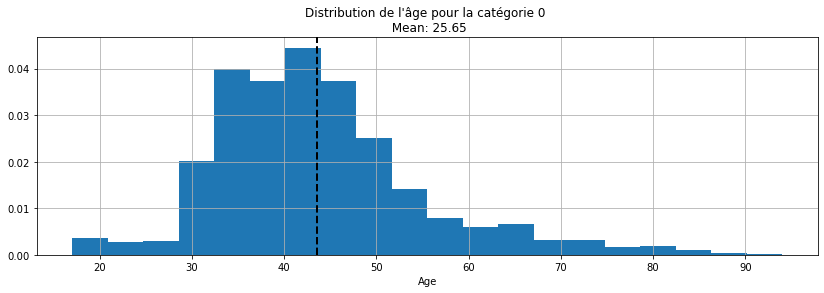

In [129]:
cat0.hist(density=True,bins=20)
plt.axvline(cat0.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title( 'Distribution de l\'âge pour la catégorie 0 \n Mean: {:.2f}'.format(cat2.mean()))
plt.xlabel('Age')
plt.show()

In [130]:
# vérifier l'asymétrie de la distribution de la variable âge pour la catégorie 1
cat1.skew()

0.18621905333472422

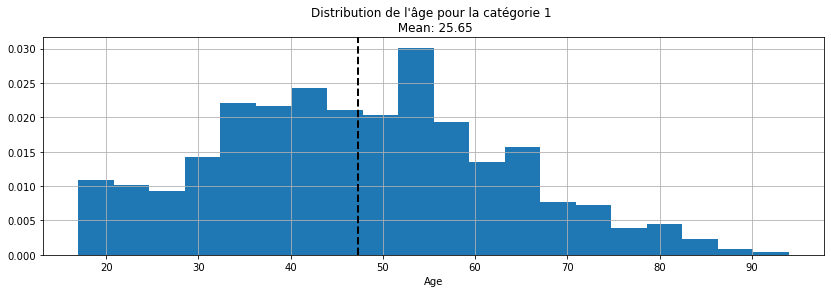

In [131]:
cat1.hist(density=True,bins=20)
plt.axvline(cat1.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title( 'Distribution de l\'âge pour la catégorie 1 \n Mean: {:.2f}'.format(cat2.mean()))
plt.xlabel('Age')
plt.show()

In [132]:
# vérifier l'asymétrie de la distribution de la variable âge pour la catégorie 2
cat2.skew()

2.9139294986717394

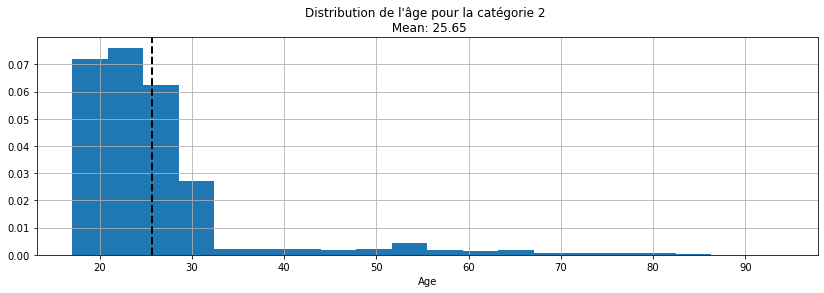

In [133]:
cat2.hist(density=True,bins=20)
plt.axvline(cat2.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title( 'Distribution de l\'âge pour la catégorie 2 \n Mean: {:.2f}'.format(cat2.mean()))
plt.xlabel('Age')
plt.show()

In [134]:
# appliquer le test anova pour confirmer ou infirmer l'hypothèse H0
F,p=st.f_oneway(d[0],d[1],d[2])
print('F :', F,'\np :',p)

F : 27.908303755709838 
p : 1.3927964388024685e-11


In [135]:
p<0.05

True

### Vu que l'âge pour les catégories 0 et 2 ne présente pas une distribution normale, nous allons réaliser un test non paramétrique 'test Kruskal-Wallis'  

In [136]:
# Utiliser un test non parametrique
f,p=st.kruskal(d[0],d[1],d[2])
p<0.05

True

##### Résultats

- Une asymétrie positive pour la catégorie 0 skew = 1
- L'âge de la catégorie 1 se rapproche de la distribution normale, skew = 0.18 
- Une asymétrie positive importante pour la catégorie 2, skew = 2.91
- p1 < 0.05 (test anova paramétrique)
- p2 < 0.05 (test Kruskal-Wallis non paramétrique)

##### Interprétation
- p < 0.05 l'hypothèse H0 rejeté
- Les moyennes sont sygnificativement différentes
La valeur p2 étant à nouveau extrêmement petite, on peut rejeter l’hypothèse d’indépendance et considérer que les distributions des âges dans les 3 catégorie sont différentes.
##### Conclusion

- Il y'a bien une corrélation entre la variable âge et catégories des livres achetés


-------
-------
### 7. Calcule de la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159
-------
-------
##### Démarche :

Effectuer les calculs su un dataset créé en selectionnant les références unique des produits achetés par chaque client

##### Calculer :
   - p_A : probabilité qu'un client achète le produit 2_159
   - p_A_int_B : probabilité qu'un client achète à la fois la référence 0_525 et 2_159
   - p_finale =  p_A_int_B / p_A

In [137]:
analyse.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,age
date,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday,36.0
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday,35.0
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday,36.0
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday,53.0
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday,54.0


In [138]:
# Isoler les id_prod uniques achetés par chaque client
list_client_prod = analyse.groupby('client_id')['id_prod'].unique()
print( list_client_prod  )

i = 0 # Variable incrémenter si la référence 2_159 est trouvé chez l'achat d'un client
j = 0 # Variable incrémenter si la référence 0_525 est trouvé chez l'achat d'un client

# Rechercher la présence de 2_159 uniquement puis de 0_525 et 2_159 simultanément dans les achats de chaque client'''
for element in list_client_prod :
    if '2_159' in element :
        i += 1
        
    if ('0_525' in element) and ('2_159' in element) :
        j += 1
        
        p_A = i / len(list_client_prod)# Probabilité que le client achéte la référence 2_159
        p_A_int_B = j / len(list_client_prod)# Probabilité que le client achète à la fois la référence 0_525 et 2_159

# Probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159
# d'après la formule des probabilités conditionnelles

p_finale = p_A_int_B / p_A
p_finale

client_id
c_1       [0_1547, 0_1571, 0_1410, 0_1090, 0_1475, 0_147...
c_10      [1_249, 1_398, 0_1383, 0_1623, 1_395, 1_265, 1...
c_100            [0_1111, 1_442, 1_547, 1_57, 2_194, 0_312]
c_1000    [0_1537, 0_1033, 0_1644, 1_376, 1_249, 0_1090,...
c_1001    [0_2054, 1_457, 0_1640, 1_253, 0_1489, 0_1380,...
                                ...                        
c_995     [0_1397, 0_1432, 1_441, 1_436, 0_1514, 1_607, ...
c_996     [0_1537, 1_249, 1_708, 1_398, 0_1399, 0_1334, ...
c_997     [0_1640, 1_397, 1_381, 1_388, 0_1405, 1_456, 1...
c_998     [1_370, 0_1385, 1_417, 1_365, 0_1115, 0_1386, ...
c_999     [0_1418, 1_381, 1_251, 0_1442, 1_247, 1_724, 1...
Name: id_prod, Length: 8598, dtype: object


0.87890625

In [139]:
p_A_int_B

0.052337752965806

In [140]:
p_A

0.05954873226331705

##### Resultats :

- p_A (probabilité qu'un client achète le produit 2_159) = 0.05954873226331705
- p_A_int_B (probabilité qu'un client achète à la fois les 2 produits 0_525 et 2_159) = 0.052337752965806
- p_finale (probabilité qu'un client achète le produit 0_525 schant qu'il a acheté le produit 2_159) = 0.87890625

##### Interprétation :

- La probabilité qu'un client achète le produit 0_525 schant qu'il a acheté le produit 2_159 est fortement élevée

##### Conclusion :

- Nous constatons qu'il y'a un lien évident entre les 2 produits 0_525 et 2_159


-------
### 8. Exploration des jours et heures des commandes 
-------

##### Démarche :
- Analyse graphique des jours et heures de commandes

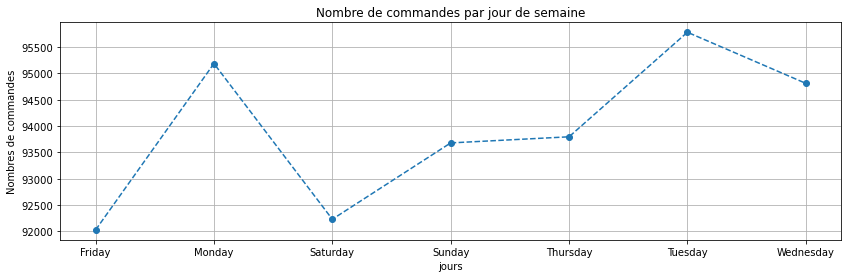

In [141]:
# Afficher le graphique des commandes (connexion) par jours
plt.figure(figsize = (14, 4))
analyse.groupby('jour')['jour'].count().plot(linestyle = 'dashed',marker = 'o')
plt.title('Nombre de commandes par jour de semaine')
plt.xlabel('jours')
plt.ylabel("Nombres de commandes")
plt.grid()
plt.show()

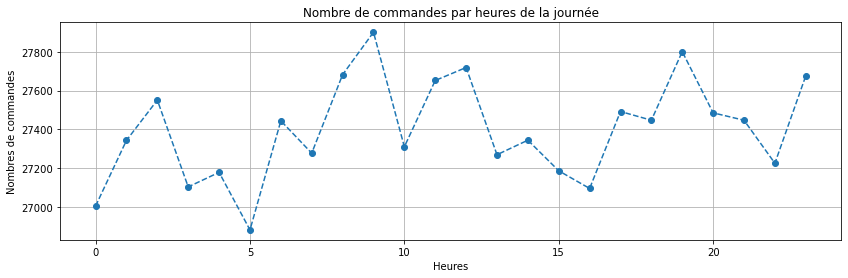

In [142]:
# Afficher le graphique des commandes (connexion) par heures
plt.figure(figsize = (14, 4))
analyse.groupby('heure')['heure'].count().plot(linestyle = 'dashed',marker = 'o')
plt.title('Nombre de commandes par heures de la journée')
plt.xlabel('Heures')
plt.ylabel("Nombres de commandes")
plt.grid()
plt.show()

##### Interprétation
- Les jours les plus riches en nombre de commandes :
       - Vendredi : 95900
       - Lundi : 95250
       - Samedi : 94900
- Les heures les plus riches en nombre de commandes :
     - Toutes les heures mis à part 5h sont incluses dans l'intrevalle en nombre de commandes de 27000-27900 avec des pics à 9h et 19h 
       

-------
-------
# CONCLUSION

- Un certain nombre de clients totalement  inactifs(21), ainsi que certains produits sans aucune commande(21),
- Un produit 0_2245 commandé 221 fois ne présente aucune référence prix, à explorer !
- Un chiffre d’affaire total de 11853728 €
- Un chiffre d’affaire du mois d’octobre 2021 anormalement bas, dû probablement à une rupture de stocks des produits de la catégorie 1 (5 jours seulement de commandes durant tout le mois)
- Un chiffre d’affaire mensuel oscillant entre 456679.76€ et 535571.50€
- Concernant les chiffre d’affaire par catégorie de produits  la CAT1 est en tête alors qu’elle est derrière la CAT0 en terme de nombre de ventes
- La répartition du chiffre d’affaire est quasi parfaite entre les hommes et les femmes, c’est le cas également par catégories entre les 2 genres
- Sur le podium des meilleurs ventes les produits de la catégorie 1 sont au sommet, contrairement au produits de la catégorie 0 qui sont les moins biens vendus
- Le chiffre d’affaire est inégalitairement réparti entre les clients(21% des clients ont dépensés 50% du chiffre d’affaire)
- Il y’a bien une corrélation entre le genre et la catégorie des produits
- Il semble bien y avoir une corrélation entre l’âge du client et :
  - Le montant total des achats
  - La fréquence d’achat
  - La taille du panier moyen  
  - La catégorie des livres achetés 
- Il est également évident qu’il y’a un lien fort entre les 2 produits 0_525 et 2_159
- Il est également observé que le vendredi, lundi et le samedi sont les jours où les clients sont les plus actifs en nombre d’achats
- Les pics en terme de nombre d’achats sont atteints à 9h et 19h

-------